In [1]:
# %pip install plotly
# %pip install openpyxl
# %pip install ydata-profiling
# %pip install ipywidgets
%pip install streamlit pyngrok pandas scikit-learn xgboost joblib plotly openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
ecomerce_df = pd.read_excel("E Commerce Dataset only.xlsx")

In [4]:
ecomerce_df.shape

(5630, 20)

In [5]:
display(ecomerce_df)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [6]:
ecomerce_df.duplicated().sum()

np.int64(0)

In [7]:
ecomerce_df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [8]:
ecomerce_df.isnull().sum().sum()

np.int64(1856)

In [9]:
ecomerce_df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [10]:
ecomerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [11]:
ecomerce_df.value_counts()

CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  PreferedOrderCat    SatisfactionScore  MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount
55630       0      8.0     Mobile Phone          1         15.0             Credit Card           Male    3.0             2                         Laptop & Accessory  3                  Married        4                0         13.0                         2.0         2.0         3.0                169.04            1
50001       1      4.0     Mobile Phone          3         6.0              Debit Card            Female  3.0             3                         Laptop & Accessory  2                  Single         9                1         11.0                         1.0         1.0         5.0                159.93            1
50004       1      0.0     Phone          

In [12]:
(ecomerce_df.isnull().sum() / len(ecomerce_df)) * 100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [13]:
median_Tenure = ecomerce_df['Tenure'].median()
print(median_Tenure)

9.0


In [14]:
ecomerce_df['Tenure'].fillna(median_Tenure, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_23016\1901201329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecomerce_df['Tenure'].fillna(median_Tenure, inplace=True)


In [15]:
WarehouseToHome_median = ecomerce_df['WarehouseToHome'].median()
print(WarehouseToHome_median)

14.0


In [16]:
ecomerce_df['WarehouseToHome'].fillna(WarehouseToHome_median, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_23016\25355649.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecomerce_df['WarehouseToHome'].fillna(WarehouseToHome_median, inplace=True)


In [17]:
HourSpendOnApp_mean = ecomerce_df['HourSpendOnApp'].mean()
print(HourSpendOnApp_mean)

2.9315348837209303


In [18]:
ecomerce_df['HourSpendOnApp'].fillna(HourSpendOnApp_mean, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_23016\3285002945.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecomerce_df['HourSpendOnApp'].fillna(HourSpendOnApp_mean, inplace=True)


In [19]:
OrderAmountHikeFromlastYear_mean = ecomerce_df['OrderAmountHikeFromlastYear'].mean()
print(OrderAmountHikeFromlastYear_mean)

15.707921714818266


In [20]:
ecomerce_df['OrderAmountHikeFromlastYear'].fillna(OrderAmountHikeFromlastYear_mean, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_23016\519964949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecomerce_df['OrderAmountHikeFromlastYear'].fillna(OrderAmountHikeFromlastYear_mean, inplace=True)


In [21]:
CouponUsed_median = ecomerce_df['CouponUsed'].median() 
print(CouponUsed_median)

1.0


In [22]:
ecomerce_df['CouponUsed'].fillna(CouponUsed_median, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_23016\2253733160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecomerce_df['CouponUsed'].fillna(CouponUsed_median, inplace=True)


In [23]:
OrderCount_mean = ecomerce_df['OrderCount'].mean()
print(OrderCount_mean)

3.0080044676098288


In [24]:
ecomerce_df['OrderCount'].fillna(OrderCount_mean, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_23016\885960797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecomerce_df['OrderCount'].fillna(OrderCount_mean, inplace=True)


In [25]:
DaySinceLastOrder_median = ecomerce_df['DaySinceLastOrder'].median()
print(DaySinceLastOrder_median)

3.0


In [26]:
ecomerce_df['DaySinceLastOrder'].fillna(DaySinceLastOrder_median, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_23016\3566763958.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecomerce_df['DaySinceLastOrder'].fillna(DaySinceLastOrder_median, inplace=True)


In [27]:
ecomerce_df.MaritalStatus

0        Single
1        Single
2        Single
3        Single
4        Single
         ...   
5625    Married
5626    Married
5627    Married
5628    Married
5629    Married
Name: MaritalStatus, Length: 5630, dtype: object

In [28]:
ecomerce_df['Gender_boolean'] = np.where(ecomerce_df['Gender'] == 'Male', 1, 0)

In [29]:
ecomerce_df["PreferredLoginDevice"].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

In [30]:
ecomerce_df["OrderCount"]=ecomerce_df["OrderCount"].round()

In [31]:
ecomerce_df["PreferredLoginDevice"]=ecomerce_df["PreferredLoginDevice"].str.replace("Mobile Phone","Phone")


In [32]:
ecomerce_df["PreferedOrderCat"]=ecomerce_df["PreferedOrderCat"].str.replace("Mobile Phone","Phone")

In [33]:
ecomerce_df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Gender_boolean'],
      dtype='object')

In [34]:
ecomerce_df['PreferredLoginDevice_boolean'] = np.where(ecomerce_df['PreferredLoginDevice'].isin(['Phone','Mobile Phone']), 1, 0)

In [35]:
ecomerce_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Gender_boolean,PreferredLoginDevice_boolean
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3.000000,3,...,Single,9,1,11.0,1.0,1.0,5.0,159.93,0,1
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.000000,4,...,Single,7,1,15.0,0.0,1.0,0.0,120.90,1,1
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.000000,4,...,Single,6,1,14.0,0.0,1.0,3.0,120.28,1,1
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.000000,4,...,Single,8,0,23.0,0.0,1.0,3.0,134.07,1,1
4,50005,1,0.0,Phone,1,12.0,CC,Male,2.931535,3,...,Single,3,0,11.0,1.0,1.0,3.0,129.60,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.000000,2,...,Married,6,0,18.0,1.0,2.0,4.0,150.71,1,0
5626,55627,0,13.0,Phone,1,13.0,Credit Card,Male,3.000000,5,...,Married,6,0,16.0,1.0,2.0,3.0,224.91,1,1
5627,55628,0,1.0,Phone,1,11.0,Debit Card,Male,3.000000,2,...,Married,3,1,21.0,1.0,2.0,4.0,186.42,1,1
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.000000,5,...,Married,4,0,15.0,2.0,2.0,9.0,178.90,1,0


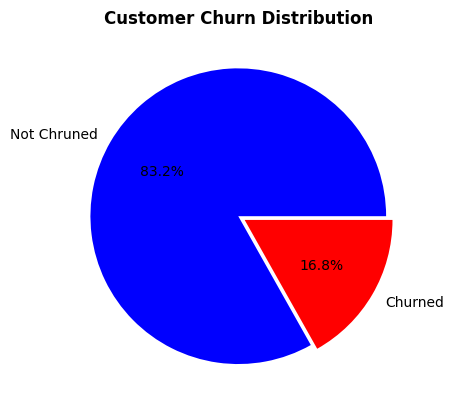

In [36]:

count_churn=ecomerce_df["Churn"].value_counts()
plt.pie(count_churn,labels=["Not Chruned","Churned"],autopct="%1.1f%%",explode=[0,.05],colors=["blue","red"])
plt.title("Customer Churn Distribution",fontdict={"fontweight":"bold"})
plt.show()


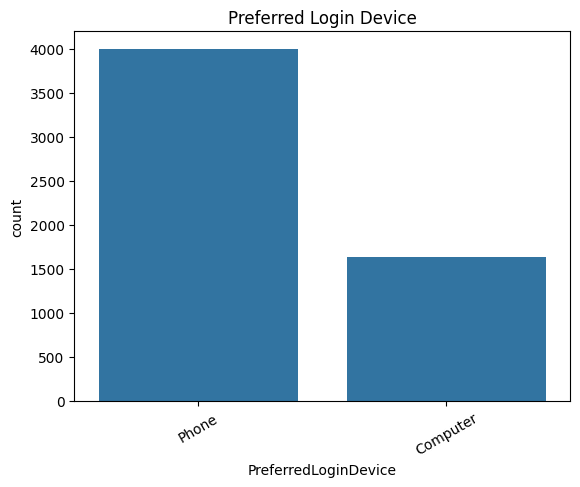

In [37]:
sns.countplot(x="PreferredLoginDevice", data=ecomerce_df, order=ecomerce_df["PreferredLoginDevice"].value_counts().index)
plt.title("Preferred Login Device")
plt.xticks(rotation=30)
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_23016\4109219729.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="PreferredPaymentMode", data=ecomerce_df, order=ecomerce_df["PreferredPaymentMode"].value_counts().index,palette=colors,edgecolor="black")
C:\Users\PC\AppData\Local\Temp\ipykernel_23016\4109219729.py:4: UserWarning: The palette list has more values (15) than needed (7), which may not be intended.
  sns.countplot(x="PreferredPaymentMode", data=ecomerce_df, order=ecomerce_df["PreferredPaymentMode"].value_counts().index,palette=colors,edgecolor="black")


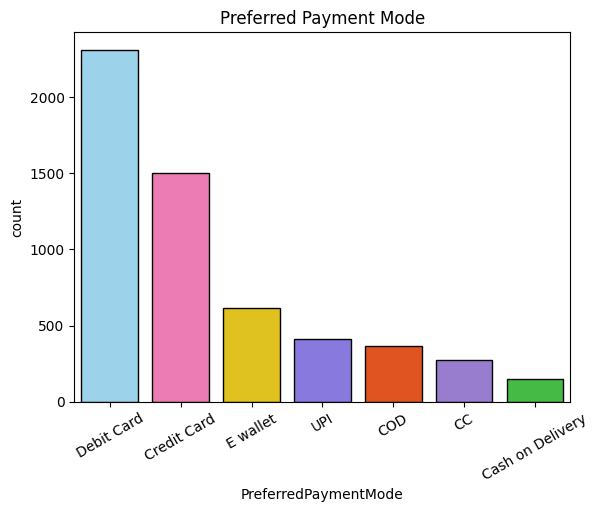

In [38]:
colors = ["#90D7F8", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#AE4532", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]
sns.countplot(x="PreferredPaymentMode", data=ecomerce_df, order=ecomerce_df["PreferredPaymentMode"].value_counts().index,palette=colors,edgecolor="black")
plt.title("Preferred Payment Mode")
plt.xticks(rotation=30)
plt.show()



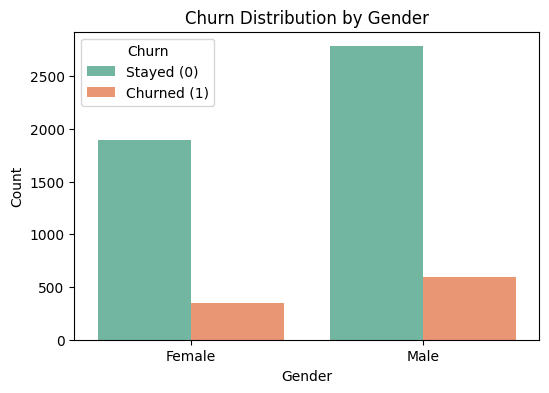

In [39]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="Gender", hue="Churn", data=ecomerce_df, palette="Set2")


plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Stayed (0)", "Churned (1)"])

In [40]:
fig = px.pie(
    ecomerce_df[ecomerce_df["Churn"]==1],
    names="PreferredPaymentMode",
    title="Preferred Payment Mode (Churned Customers)"
)
fig.show()

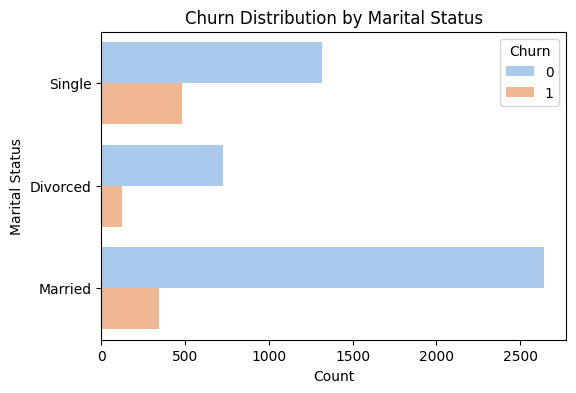

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(y="MaritalStatus", hue="Churn", data=ecomerce_df, palette="pastel")
plt.title("Churn Distribution by Marital Status")
plt.xlabel("Count")
plt.ylabel("Marital Status")
plt.show()


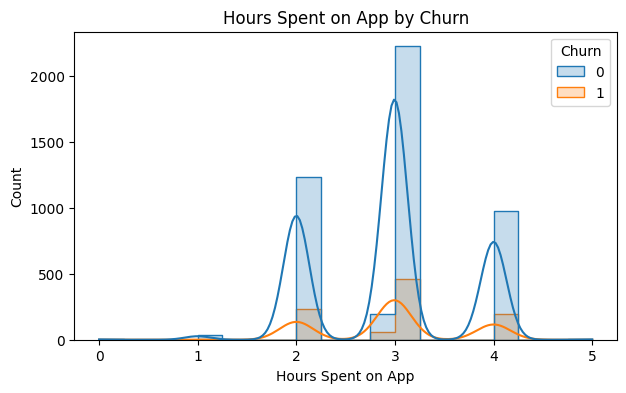

In [42]:
plt.figure(figsize=(7,4))
sns.histplot(data=ecomerce_df, x="HourSpendOnApp", hue="Churn", kde=True, element="step", bins=20)
plt.title("Hours Spent on App by Churn")
plt.xlabel("Hours Spent on App")
plt.ylabel("Count")
plt.show()

In [43]:
#profile = ProfileReport(ecomerce_df, title="E-Commerce Churn EDA Report", explorative=True)

#profile.to_notebook_iframe()

In [44]:
#t-test
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["Tenure"]
x_tenure=ecomerce_df[ecomerce_df["Churn"] == 0]["Tenure"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_tenure)
print(t_statistcs,p_value) #p_value < 0.05

-26.927204328509323 2.494913539747146e-150


In [45]:
x_login=ecomerce_df.PreferredLoginDevice
congtingency=pd.crosstab(ecomerce_df["Churn"],ecomerce_df["PreferredLoginDevice"])
chi_2,p_value,dof,expected=stats.chi2_contingency(congtingency)
print(chi_2,p_value)#p_value < 0.05

14.40125265089403 0.0001477040239947965


In [46]:
tier1 = ecomerce_df[ecomerce_df["CityTier"] == 1]["Tenure"]
tier2 = ecomerce_df[ecomerce_df["CityTier"] == 2]["Tenure"]
tier3 = ecomerce_df[ecomerce_df["CityTier"] == 3]["Tenure"]
f_stats,p_value=stats.f_oneway(tier1,tier2,tier3)
print(f_stats,p_value)  #p_value < .05

11.307283528901458 1.2564658258444098e-05


In [47]:
#t-test
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["WarehouseToHome"]
x_ware=ecomerce_df[ecomerce_df["Churn"] == 0]["WarehouseToHome"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_ware)
print(t_statistcs,p_value) #p_value < 0.05 

5.229831299478068 1.7579836224030932e-07


In [48]:
congtingency=pd.crosstab(ecomerce_df["Churn"],ecomerce_df["PreferredPaymentMode"])
chi_2,p_value,dof,expected=stats.chi2_contingency(congtingency)
print(chi_2,p_value)#p_value < 0.05

77.89682023026812 9.708708511076305e-15


In [49]:
congtingency=pd.crosstab(ecomerce_df["Churn"],ecomerce_df["Gender"])
chi_2,p_value,dof,expected=stats.chi2_contingency(congtingency)
print(chi_2,p_value)#p_value < 0.05 

4.662908495367532 0.03082094033489009


In [50]:
#t-test
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["HourSpendOnApp"]
x_app=ecomerce_df[ecomerce_df["Churn"] == 0]["HourSpendOnApp"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_app)
print(t_statistcs,p_value) #p_value > 0.05

1.3600078128387554 0.1738819262508301


In [51]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["NumberOfDeviceRegistered"]
x_dev=ecomerce_df[ecomerce_df["Churn"] == 0]["NumberOfDeviceRegistered"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_dev)
print(t_statistcs,p_value) #p_value < 0.05

8.145136855113543 4.626451530290173e-16


In [52]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["OrderAmountHikeFromlastYear"]
x_dev=ecomerce_df[ecomerce_df["Churn"] == 0]["OrderAmountHikeFromlastYear"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_dev)
print(t_statistcs,p_value) #p_value > 0.05  

-0.7464232384504431 0.45544296328867817


In [53]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["CouponUsed"]
x_cop=ecomerce_df[ecomerce_df["Churn"] == 0]["CouponUsed"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_cop)
print(t_statistcs,p_value) #p_value > 0.05  

-0.10728700657961801 0.9145651164356325


In [54]:
ecomerce_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Gender_boolean,PreferredLoginDevice_boolean
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3.000000,3,...,Single,9,1,11.0,1.0,1.0,5.0,159.93,0,1
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.000000,4,...,Single,7,1,15.0,0.0,1.0,0.0,120.90,1,1
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.000000,4,...,Single,6,1,14.0,0.0,1.0,3.0,120.28,1,1
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.000000,4,...,Single,8,0,23.0,0.0,1.0,3.0,134.07,1,1
4,50005,1,0.0,Phone,1,12.0,CC,Male,2.931535,3,...,Single,3,0,11.0,1.0,1.0,3.0,129.60,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.000000,2,...,Married,6,0,18.0,1.0,2.0,4.0,150.71,1,0
5626,55627,0,13.0,Phone,1,13.0,Credit Card,Male,3.000000,5,...,Married,6,0,16.0,1.0,2.0,3.0,224.91,1,1
5627,55628,0,1.0,Phone,1,11.0,Debit Card,Male,3.000000,2,...,Married,3,1,21.0,1.0,2.0,4.0,186.42,1,1
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.000000,5,...,Married,4,0,15.0,2.0,2.0,9.0,178.90,1,0


In [55]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["OrderCount"]
x_ord=ecomerce_df[ecomerce_df["Churn"] == 0]["OrderCount"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_ord)
print(t_statistcs,p_value) #p_value < 0.05  

-2.1245369579135542 0.03366873654590884


In [56]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["DaySinceLastOrder"]
x_ord=ecomerce_df[ecomerce_df["Churn"] == 0]["DaySinceLastOrder"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_ord)
print(t_statistcs,p_value) #p_value < 0.05   

-11.838127578080636 5.920403597328295e-32


In [57]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["CashbackAmount"]
x_ord=ecomerce_df[ecomerce_df["Churn"] == 0]["CashbackAmount"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_ord)
print(t_statistcs,p_value) #p_value < 0.05   

-11.701754038593704 2.867709304816521e-31


In [58]:
ecomerce_df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Gender_boolean',
       'PreferredLoginDevice_boolean'],
      dtype='object')

In [59]:
ecomerce_df[['PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain']]

,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain
0,Laptop & Accessory,2,Single,9,1
1,Mobile,3,Single,7,1
2,Mobile,3,Single,6,1
3,Laptop & Accessory,5,Single,8,0
4,Mobile,5,Single,3,0
...,...,...,...,...,...
5625,Laptop & Accessory,1,Married,6,0
5626,Fashion,5,Married,6,0
5627,Laptop & Accessory,4,Married,3,1
5628,Laptop & Accessory,4,Married,4,0


In [60]:
congtingency=pd.crosstab(ecomerce_df["Churn"],ecomerce_df["PreferedOrderCat"])
chi_2,p_value,dof,expected=stats.chi2_contingency(congtingency)
print(chi_2,p_value)#p_value < 0.05

288.63939355672443 2.7708325346337454e-60


In [61]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["SatisfactionScore"]
x_ord=ecomerce_df[ecomerce_df["Churn"] == 0]["SatisfactionScore"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_ord)
print(t_statistcs,p_value) #p_value < 0.05   

7.957588346935353 2.105157407388599e-15


In [62]:
congtingency=pd.crosstab(ecomerce_df["Churn"],ecomerce_df["MaritalStatus"])
chi_2,p_value,dof,expected=stats.chi2_contingency(congtingency)
print(chi_2,p_value)#p_value < 0.05

188.6710396770566 1.073011277910542e-41


In [63]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["NumberOfAddress"]
x_ord=ecomerce_df[ecomerce_df["Churn"] == 0]["NumberOfAddress"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_ord)
print(t_statistcs,p_value) #p_value < 0.05   

3.298889512991889 0.0009767132246168275


In [64]:
congtingency=pd.crosstab(ecomerce_df["Churn"],ecomerce_df["Complain"])
chi_2,p_value,dof,expected=stats.chi2_contingency(congtingency)
print(chi_2,p_value)#p_value < 0.05

350.92545525927073 2.6644609654641377e-78


In [65]:
ecomerce_df.dtypes

CustomerID                        int64
Churn                             int64
Tenure                          float64
PreferredLoginDevice             object
CityTier                          int64
WarehouseToHome                 float64
PreferredPaymentMode             object
Gender                           object
HourSpendOnApp                  float64
NumberOfDeviceRegistered          int64
PreferedOrderCat                 object
SatisfactionScore                 int64
MaritalStatus                    object
NumberOfAddress                   int64
Complain                          int64
OrderAmountHikeFromlastYear     float64
CouponUsed                      float64
OrderCount                      float64
DaySinceLastOrder               float64
CashbackAmount                  float64
Gender_boolean                    int64
PreferredLoginDevice_boolean      int64
dtype: object

In [66]:
ecomerce_ml=ecomerce_df.copy()


In [67]:
le=LabelEncoder()
ecomerce_ml["PreferredPaymentMode"]=le.fit_transform(ecomerce_ml["PreferredPaymentMode"])
mapping_of_Payment = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping_of_Payment)

{'CC': np.int64(0), 'COD': np.int64(1), 'Cash on Delivery': np.int64(2), 'Credit Card': np.int64(3), 'Debit Card': np.int64(4), 'E wallet': np.int64(5), 'UPI': np.int64(6)}


In [68]:
ecomerce_ml["PreferedOrderCat"]=le.fit_transform(ecomerce_ml["PreferedOrderCat"])
mapping_of_OrderCat = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping_of_OrderCat)

{'Fashion': np.int64(0), 'Grocery': np.int64(1), 'Laptop & Accessory': np.int64(2), 'Mobile': np.int64(3), 'Others': np.int64(4), 'Phone': np.int64(5)}


In [69]:
ecomerce_ml["MaritalStatus"]=le.fit_transform(ecomerce_ml["MaritalStatus"])
mapping_of_MS = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping_of_MS)

{'Divorced': np.int64(0), 'Married': np.int64(1), 'Single': np.int64(2)}


In [70]:
ecomerce_ml["Gender"]=le.fit_transform(ecomerce_ml["Gender"])

In [71]:
ecomerce_ml["PreferredLoginDevice"]=le.fit_transform(ecomerce_ml["PreferredLoginDevice"])

In [72]:
ecomerce_ml.skew()

CustomerID                      0.000000
Churn                           1.772843
Tenure                          0.773278
PreferredLoginDevice           -0.924606
CityTier                        0.735326
WarehouseToHome                 1.678346
PreferredPaymentMode           -0.717749
Gender                         -0.412893
HourSpendOnApp                 -0.027850
NumberOfDeviceRegistered       -0.396969
PreferedOrderCat                0.161238
SatisfactionScore              -0.142626
MaritalStatus                  -0.202354
NumberOfAddress                 1.088639
Complain                        0.953347
OrderAmountHikeFromlastYear     0.810069
CouponUsed                      2.630035
OrderCount                      2.248892
DaySinceLastOrder               1.273530
CashbackAmount                  1.149846
Gender_boolean                 -0.412893
PreferredLoginDevice_boolean   -0.924606
dtype: float64

In [73]:
logscale_feature=["WarehouseToHome","NumberOfAddress","CouponUsed","OrderCount","DaySinceLastOrder","CashbackAmount"]

In [74]:
for i in logscale_feature:
    ecomerce_ml[i]=np.log1p(ecomerce_ml[i])

In [75]:
ecomerce_ml.skew()

CustomerID                      0.000000
Churn                           1.772843
Tenure                          0.773278
PreferredLoginDevice           -0.924606
CityTier                        0.735326
WarehouseToHome                 0.293595
PreferredPaymentMode           -0.717749
Gender                         -0.412893
HourSpendOnApp                 -0.027850
NumberOfDeviceRegistered       -0.396969
PreferedOrderCat                0.161238
SatisfactionScore              -0.142626
MaritalStatus                  -0.202354
NumberOfAddress                 0.234165
Complain                        0.953347
OrderAmountHikeFromlastYear     0.810069
CouponUsed                      0.428617
OrderCount                      1.101636
DaySinceLastOrder              -0.379393
CashbackAmount                 -3.779430
Gender_boolean                 -0.412893
PreferredLoginDevice_boolean   -0.924606
dtype: float64

In [76]:
ecomerce_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    5630 non-null   int64  
 1   Churn                         5630 non-null   int64  
 2   Tenure                        5630 non-null   float64
 3   PreferredLoginDevice          5630 non-null   int64  
 4   CityTier                      5630 non-null   int64  
 5   WarehouseToHome               5630 non-null   float64
 6   PreferredPaymentMode          5630 non-null   int64  
 7   Gender                        5630 non-null   int64  
 8   HourSpendOnApp                5630 non-null   float64
 9   NumberOfDeviceRegistered      5630 non-null   int64  
 10  PreferedOrderCat              5630 non-null   int64  
 11  SatisfactionScore             5630 non-null   int64  
 12  MaritalStatus                 5630 non-null   int64  
 13  Num

In [77]:
X=ecomerce_ml.drop(["Churn"],axis=1)
y=ecomerce_ml["Churn"]

In [78]:
scale=StandardScaler()
X_scaled=scale.fit_transform(X)

In [79]:
rfe =RFE(estimator=LogisticRegression(),n_features_to_select=1)
rfe.fit(X_scaled,y)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [80]:
feature_ranks=pd.DataFrame({"Feature":X.columns,
                           "Ranking":rfe.ranking_})
print(feature_ranks.sort_values(by="Ranking"))

                         Feature  Ranking
1                         Tenure        1
13                      Complain        2
12               NumberOfAddress        3
17             DaySinceLastOrder        4
16                    OrderCount        5
10             SatisfactionScore        6
11                 MaritalStatus        7
8       NumberOfDeviceRegistered        8
0                     CustomerID        9
3                       CityTier       10
9               PreferedOrderCat       11
4                WarehouseToHome       12
2           PreferredLoginDevice       13
19                Gender_boolean       14
20  PreferredLoginDevice_boolean       15
14   OrderAmountHikeFromlastYear       16
6                         Gender       17
5           PreferredPaymentMode       18
15                    CouponUsed       19
7                 HourSpendOnApp       20
18                CashbackAmount       21


In [81]:
rfe=RFE(estimator=RandomForestClassifier(),n_features_to_select=1)
rfe.fit(X_scaled,y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=1)

In [82]:
feature_ranks=pd.DataFrame({"Feature":X.columns,
                           "Ranking":rfe.ranking_})
print(feature_ranks.sort_values(by="Ranking"))

                         Feature  Ranking
18                CashbackAmount        1
0                     CustomerID        2
1                         Tenure        3
4                WarehouseToHome        4
14   OrderAmountHikeFromlastYear        5
17             DaySinceLastOrder        6
12               NumberOfAddress        7
13                      Complain        8
10             SatisfactionScore        9
5           PreferredPaymentMode       10
8       NumberOfDeviceRegistered       11
9               PreferedOrderCat       12
16                    OrderCount       13
11                 MaritalStatus       14
3                       CityTier       15
15                    CouponUsed       16
7                 HourSpendOnApp       17
2           PreferredLoginDevice       18
19                Gender_boolean       19
6                         Gender       20
20  PreferredLoginDevice_boolean       21


In [83]:
fig1=px.histogram(
    ecomerce_df,x="Tenure",color="Churn",color_discrete_map={0:"blue",1:"red"},title="Count of Churned Customers according to Tenure"
)
fig1.show()

In [84]:
cross = pd.crosstab(ecomerce_df['Complain'], ecomerce_df['Churn'])

fig2=px.imshow(cross, text_auto=True,title="Complain vs Churn Heatmap",color_continuous_scale="Viridis")
fig2.update_yaxes(
    tickmode="array",
    tickvals=[0,1],
    title_text="",
    ticktext=["Complained","Not Complained"],
)
fig2.update_xaxes(
    tickmode="array",
    tickvals=[0,1],
    ticktext=["Non Churned","Churned"]
)
fig2.update_layout(
    title_x=.49
)


In [85]:
c=ecomerce_df.groupby(["Complain","Churn","OrderCount"]).size().reset_index(name="Count")
z=c[c["Complain"]== 1]
fig7=px.histogram(z,x="Complain",y="Count",color="OrderCount",facet_row="Churn",barmode="group",title="Churn VS Complain and OrderCount")
fig7.update_yaxes(title_text="Customers")
for a in fig7.layout.annotations:
    if a.text== "Churn=0":
        a.text="Stayed"
    else:
        a.text ="Churned"

fig7.show()        

In [86]:
a=px.histogram(ecomerce_df,x="SatisfactionScore",color="Churn",barmode="group",color_discrete_map={0:"navy",1:"crimson"},title="Churned Customers vs Satisfaction Score")
for trace in a.data:
    if trace.name == "1":
        trace.name="Churned"
    else:
        trace.name="Stayed"
a.update_layout(
    
)
a.show()

In [87]:
churn_trend_sat = ecomerce_df.groupby(["SatisfactionScore","PreferedOrderCat"])["Churn"].mean().reset_index()
fig3=px.line(
    churn_trend_sat,
    x="SatisfactionScore",
    y="Churn",
    color="PreferedOrderCat",
    markers=True,
    title="Churn rate According to Satisfaction Score of each Category"
)
fig3.update_layout(
    xaxis_title="Satisfaction Score",
    yaxis_title="Churn Rate"
)
fig3.update_xaxes(
    tickmode="array",
    tickvals=[1,2,3,4,5]
)
fig3.show()

In [88]:
fig4=px.histogram(ecomerce_df,x="NumberOfAddress",color="Churn",barmode="group",title="Churn Count According to Number of Addresses")
for trace in fig4.data:
    if trace.name == "1":
        trace.name="Churned"
    else:
        trace.name="Stayed"

fig4.update_layout(
    title_x=.45,
)
fig4.show()

In [89]:
churn_trend_since = ecomerce_df.groupby(["DaySinceLastOrder"])["Churn"].mean().reset_index()
fig6 = px.line(
    churn_trend_since,
    x="DaySinceLastOrder",
    y="Churn",
    title="Churn vs Days Since Last Order"
)
fig6.update_layout(
    bargap=.05,
)
fig6.update_layout(
    title_x=.45
)
fig6.show()


In [90]:
churn_trend = ecomerce_df.groupby(["DaySinceLastOrder","PreferedOrderCat"])["Churn"].mean().reset_index()

fig8 = px.line(
    churn_trend,
    x="DaySinceLastOrder",
    y="Churn",
    color="PreferedOrderCat",
    title="Churn Rate vs Days Since Last Order according to Category",
    markers='o',
    
)
fig8.update_layout(
    yaxis_title="Churn Rate"
)
fig8.update_layout(
    title_x=.45
)

fig8.show()

In [91]:
X=ecomerce_ml.drop("Churn",axis=1)
y=ecomerce_ml["Churn"]

pipe=Pipeline([('scaler',StandardScaler()),
               ('model',LogisticRegression(max_iter=1000,class_weight='balanced'))
            ])

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42,stratify=y)

cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

cv_scores=cross_val_score(pipe,x_train,y_train,cv=cv,scoring='roc_auc')

print("Cross-validation ROC-AUC per fold:", cv_scores)
print("Mean CV ROC-AUC:", cv_scores.mean())

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
y_proba = pipe.predict_proba(x_test)[:,1]
print("Test ROC-AUC:",roc_auc_score(y_test,y_proba))

Cross-validation ROC-AUC per fold: [0.8844415  0.87759996 0.85925093 0.88251001 0.89449951]
Mean CV ROC-AUC: 0.8796603825277746
Test ROC-AUC: 0.8662112010796222


               precision    recall  f1-score   support

Non Churn (0)       0.95      0.78      0.86       936
    Churn (1)       0.42      0.78      0.55       190

     accuracy                           0.78      1126
    macro avg       0.68      0.78      0.70      1126
 weighted avg       0.86      0.78      0.80      1126



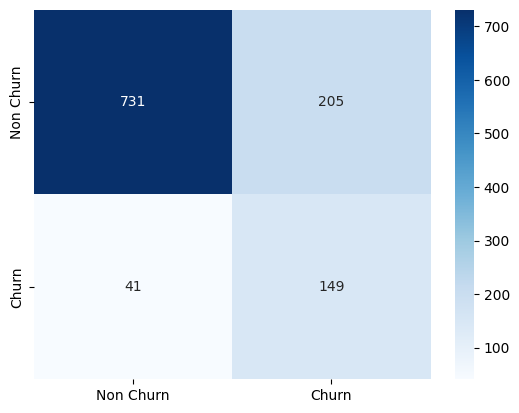

In [92]:
print(classification_report(y_test,y_pred,target_names=["Non Churn (0)","Churn (1)"]))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='Blues',annot=True,fmt='d',xticklabels=["Non Churn","Churn"],yticklabels=["Non Churn","Churn"])
plt.show()

Machine Learning

In [93]:
X=ecomerce_ml.drop(["Churn"],axis=1)
y=ecomerce_ml["Churn"]

pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('model',RandomForestClassifier(n_estimators=200,class_weight='balanced',min_samples_split=2,min_samples_leaf=1))
])

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42,stratify=y)

cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

cv_scores= cross_val_score(pipe,x_train,y_train,cv=cv,scoring='roc_auc')

print("Cross-validation ROC-AUC per fold:", cv_scores)
print("Mean CV ROC-AUC:", cv_scores.mean())

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
y_proba = pipe.predict_proba(x_test)[:, 1]
print("Test ROC-AUC:", roc_auc_score(y_test,y_proba))


Cross-validation ROC-AUC per fold: [0.98610596 0.97534432 0.96803633 0.97611289 0.96835074]
Mean CV ROC-AUC: 0.974790046493966
Test ROC-AUC: 0.9965474583895637


               precision    recall  f1-score   support

Non Churn (0)       0.96      0.99      0.98       936
    Churn (1)       0.96      0.82      0.89       190

     accuracy                           0.96      1126
    macro avg       0.96      0.91      0.93      1126
 weighted avg       0.96      0.96      0.96      1126



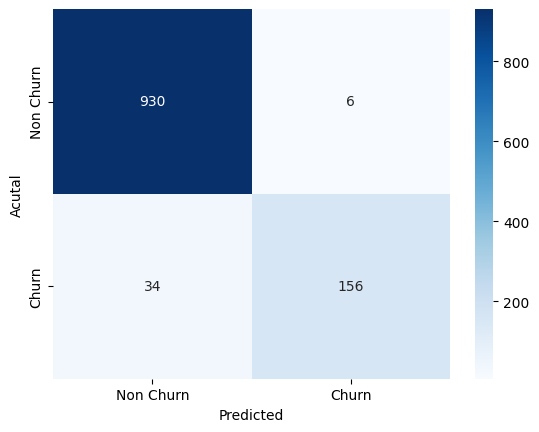

In [94]:
print(classification_report(y_test,y_pred,target_names=["Non Churn (0)","Churn (1)"]))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=["Non Churn","Churn"],yticklabels=["Non Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Acutal")
plt.show()

In [95]:
X=ecomerce_ml.drop(["Churn"],axis=1)
y=ecomerce_ml["Churn"]
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=.2,random_state=42,stratify=y)
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('model',XGBClassifier(objective="binary:logistic"))
])

cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

cv_scores=cross_val_score(pipe,x_train,y_train,cv=cv,scoring="roc_auc")
print("Cross-validation ROC-AUC per fold:", cv_scores)
print("Mean CV ROC-AUC:", cv_scores.mean())

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
y_proba=pipe.predict_proba(x_test)[:,1]
print("Test ROC-AUC:", roc_auc_score(y_test,y_proba))

Cross-validation ROC-AUC per fold: [0.9799117  0.97144438 0.9561872  0.97201532 0.96862041]
Mean CV ROC-AUC: 0.9696358019204723
Test ROC-AUC: 0.9969017094017094


               precision    recall  f1-score   support

Non Churn (0)       0.99      0.99      0.99       936
    Churn (1)       0.94      0.94      0.94       190

     accuracy                           0.98      1126
    macro avg       0.96      0.96      0.96      1126
 weighted avg       0.98      0.98      0.98      1126



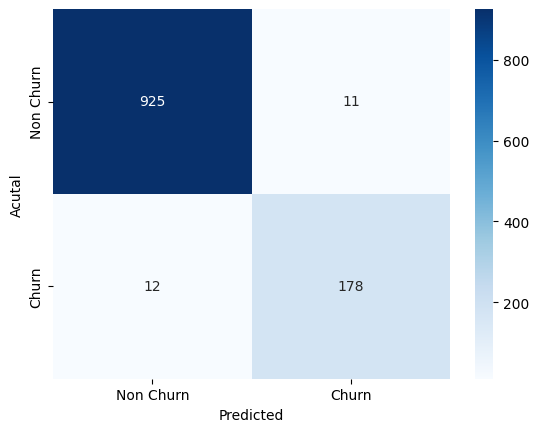

In [96]:
print(classification_report(y_test,y_pred,target_names=["Non Churn (0)","Churn (1)"]))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=["Non Churn","Churn"],yticklabels=["Non Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Acutal")
plt.show()

In [97]:
!ngrok authtoken 35OCOUhI37h34Hy8wveRmJAkdEU_HA9rSj1wqusNcoaUrKFj

Authtoken saved to configuration file: C:\Users\PC\AppData\Local/ngrok/ngrok.yml


In [101]:
import subprocess
from pyngrok import ngrok
import time

# Kill any previous tunnels
ngrok.kill()

# Start Streamlit in the background
p = subprocess.Popen([
    "python", "-m", "streamlit", "run", "streamlit_churn_app.py",
    "--server.headless=true",
    "--server.port=8501"
])

# Give Streamlit a few seconds to start
time.sleep(5)

# Open ngrok tunnel to port 8501
public_url = ngrok.connect(8501, "http")
print("Your Streamlit app is live at:", public_url)


Your Streamlit app is live at: NgrokTunnel: "https://untillable-malorie-spaviet.ngrok-free.dev" -> "http://localhost:8501"
